# EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")
sample = pd.read_csv("/content/SampleSubmission.csv")

Hypothesis 
- Are younger customers more likely to subscribe to a term deposit as compared to old customers?
- Are people with a higher bank balance more likely to subscribe to term deposit instead of people with low bank balance?
- Does married person has high chance to subscribe a term deposit compared to a single or divorced person?
- Does the length of the call made to the customers tell us anything about their chances of subscribing?
- Does people without loan have more chances to subscribe for term deposit?
- Do a defaulted person has less chance of subscribing to term deposit?

In [ ]:
import warnings 
warnings.simplefilter("ignore")

In [ ]:
train.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [ ]:
test.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success


In [ ]:
ID_COL, TARGET_COL = "id", "term_deposit_subscribed"

In [ ]:
print(f"\nThe training set consist of {train.shape[0]} samples and {train.shape[1]} variables")
print(f"\nThe test set consist of {test.shape[0]} samples and {test.shape[1]} variables")
features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
print(f"\nThe dataset consist of {len(features)} features")


The training set consist of 31647 samples and 18 variables

The test set consist of 13564 samples and 17 variables

The dataset consist of 16 features


In [ ]:
train[TARGET_COL].value_counts(normalize = True)

0    0.892754
1    0.107246
Name: term_deposit_subscribed, dtype: float64

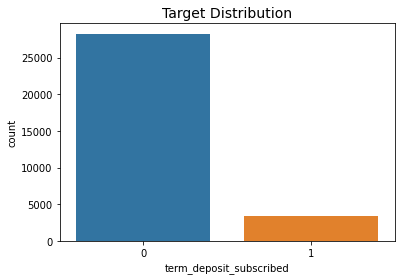

In [ ]:
_ = sns.countplot(train[TARGET_COL])
_ = plt.title("Target Distribution", fontsize = 14)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [ ]:
null_values = 100*(train.isnull().sum()/train.shape[0]).round(3)
null_values.sort_values(ascending=False)

days_since_prev_campaign_contact    81.6
customer_age                         2.0
balance                              1.3
last_contact_duration                1.0
personal_loan                        0.5
marital                              0.5
num_contacts_in_campaign             0.4
job_type                             0.0
education                            0.0
default                              0.0
term_deposit_subscribed              0.0
housing_loan                         0.0
prev_campaign_outcome                0.0
communication_type                   0.0
day_of_month                         0.0
month                                0.0
num_contacts_prev_campaign           0.0
id                                   0.0
dtype: float64

In [ ]:
train.nunique()

id                                  31647
customer_age                           77
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              6563
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1447
num_contacts_in_campaign               46
days_since_prev_campaign_contact      511
num_contacts_prev_campaign             41
prev_campaign_outcome                   4
term_deposit_subscribed                 2
dtype: int64

In [ ]:
train.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

In [ ]:
cat_cols = ["job_type","marital","education","default","housing_loan",
            "personal_loan","communication_type","month","prev_campaign_outcome"]

In [ ]:
num_cols = [c for c in features if c not in cat_cols]
num_cols

['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign']

Categorical Features

Univariate Analysis


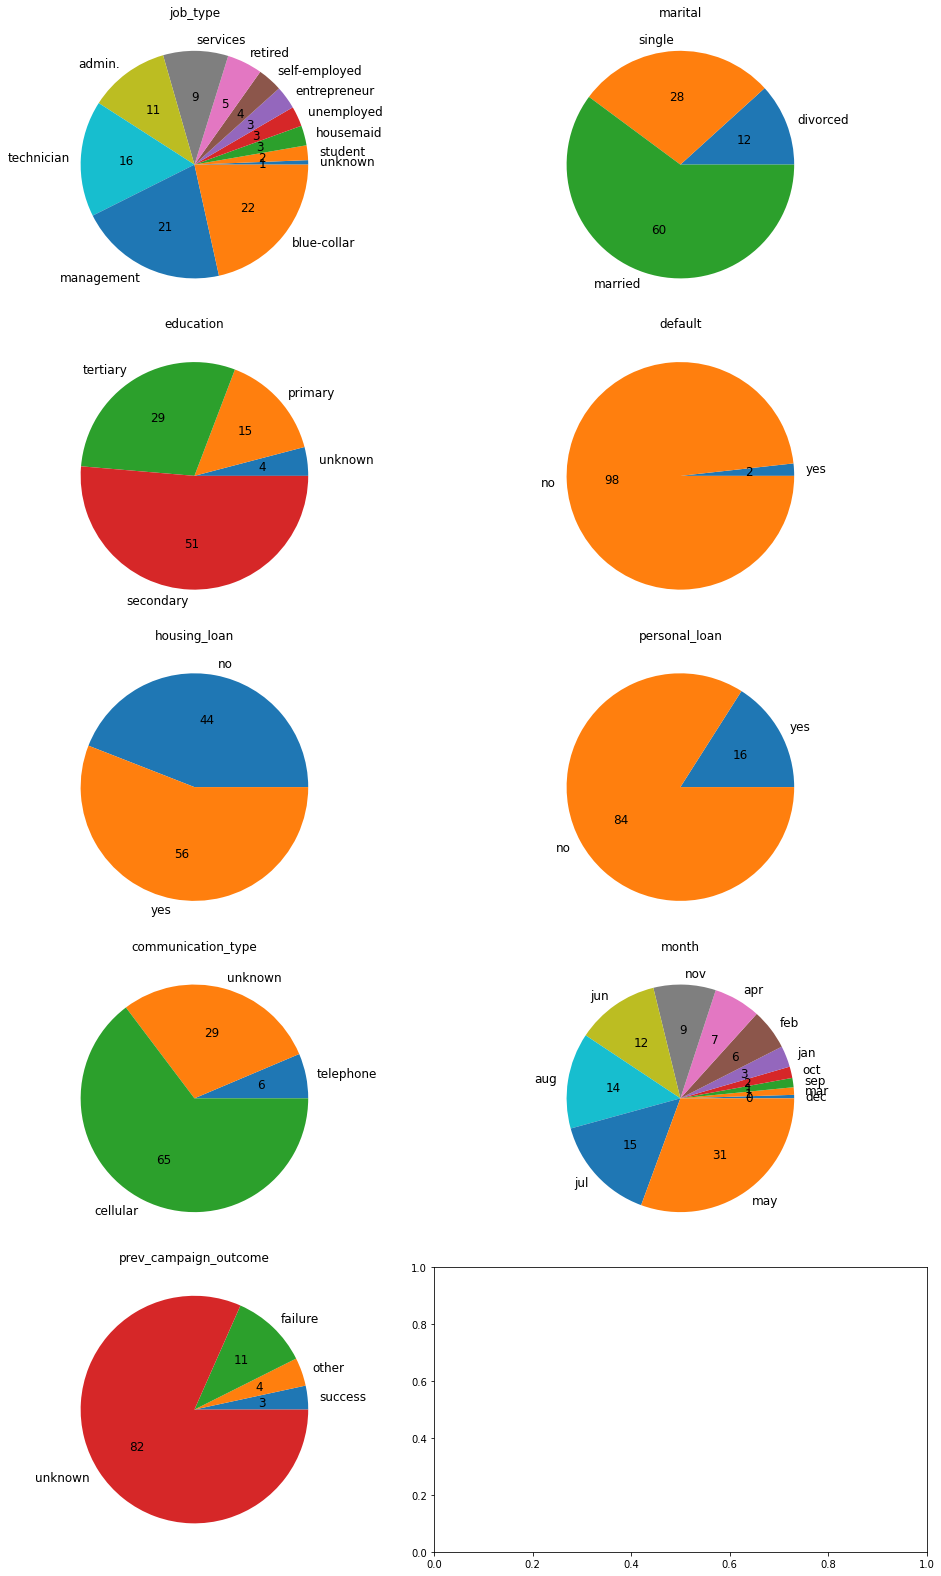

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(14, 22))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = "pie", ax=axes[i],title=c, autopct="%.0f",fontsize = 12)
    _ = axes[i].set_ylabel("")

_ = plt.tight_layout()

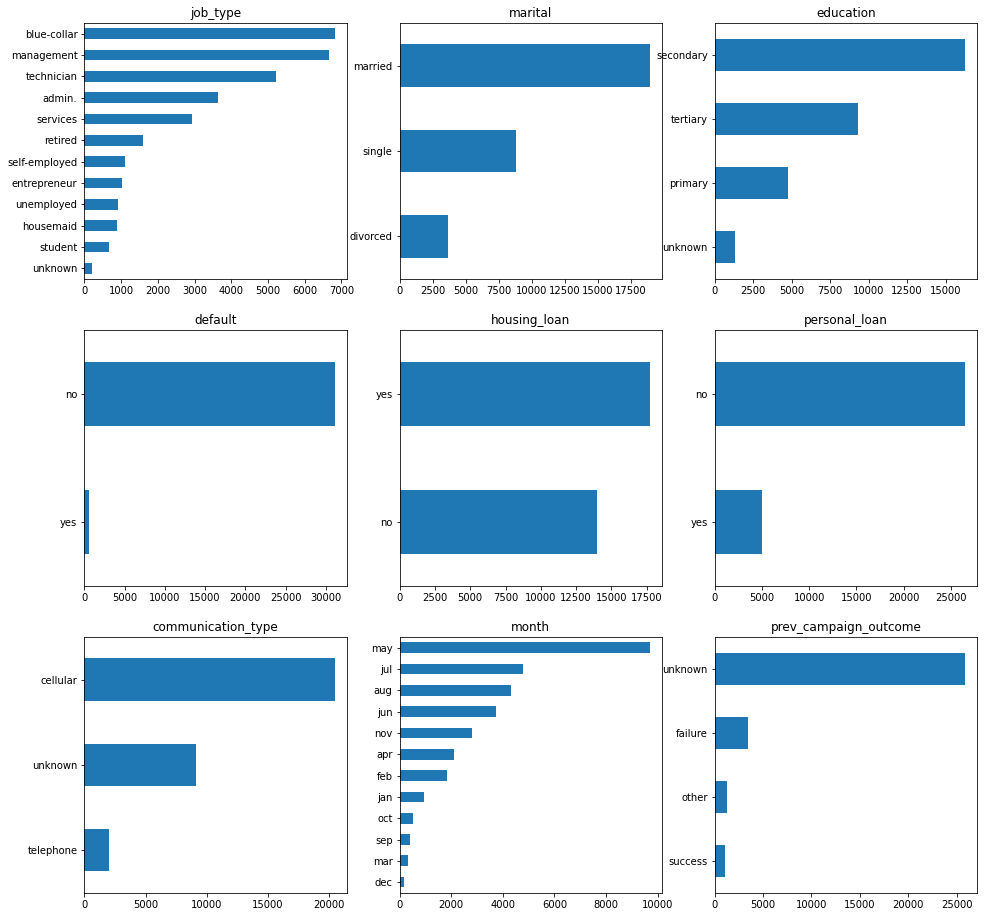

In [ ]:
fig, axes = plt.subplots(3,3, figsize = (16, 16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = "barh", ax = axes[i], title=c, fontsize= 10)

_ = plt.tight_layout

Bivariate Analysis

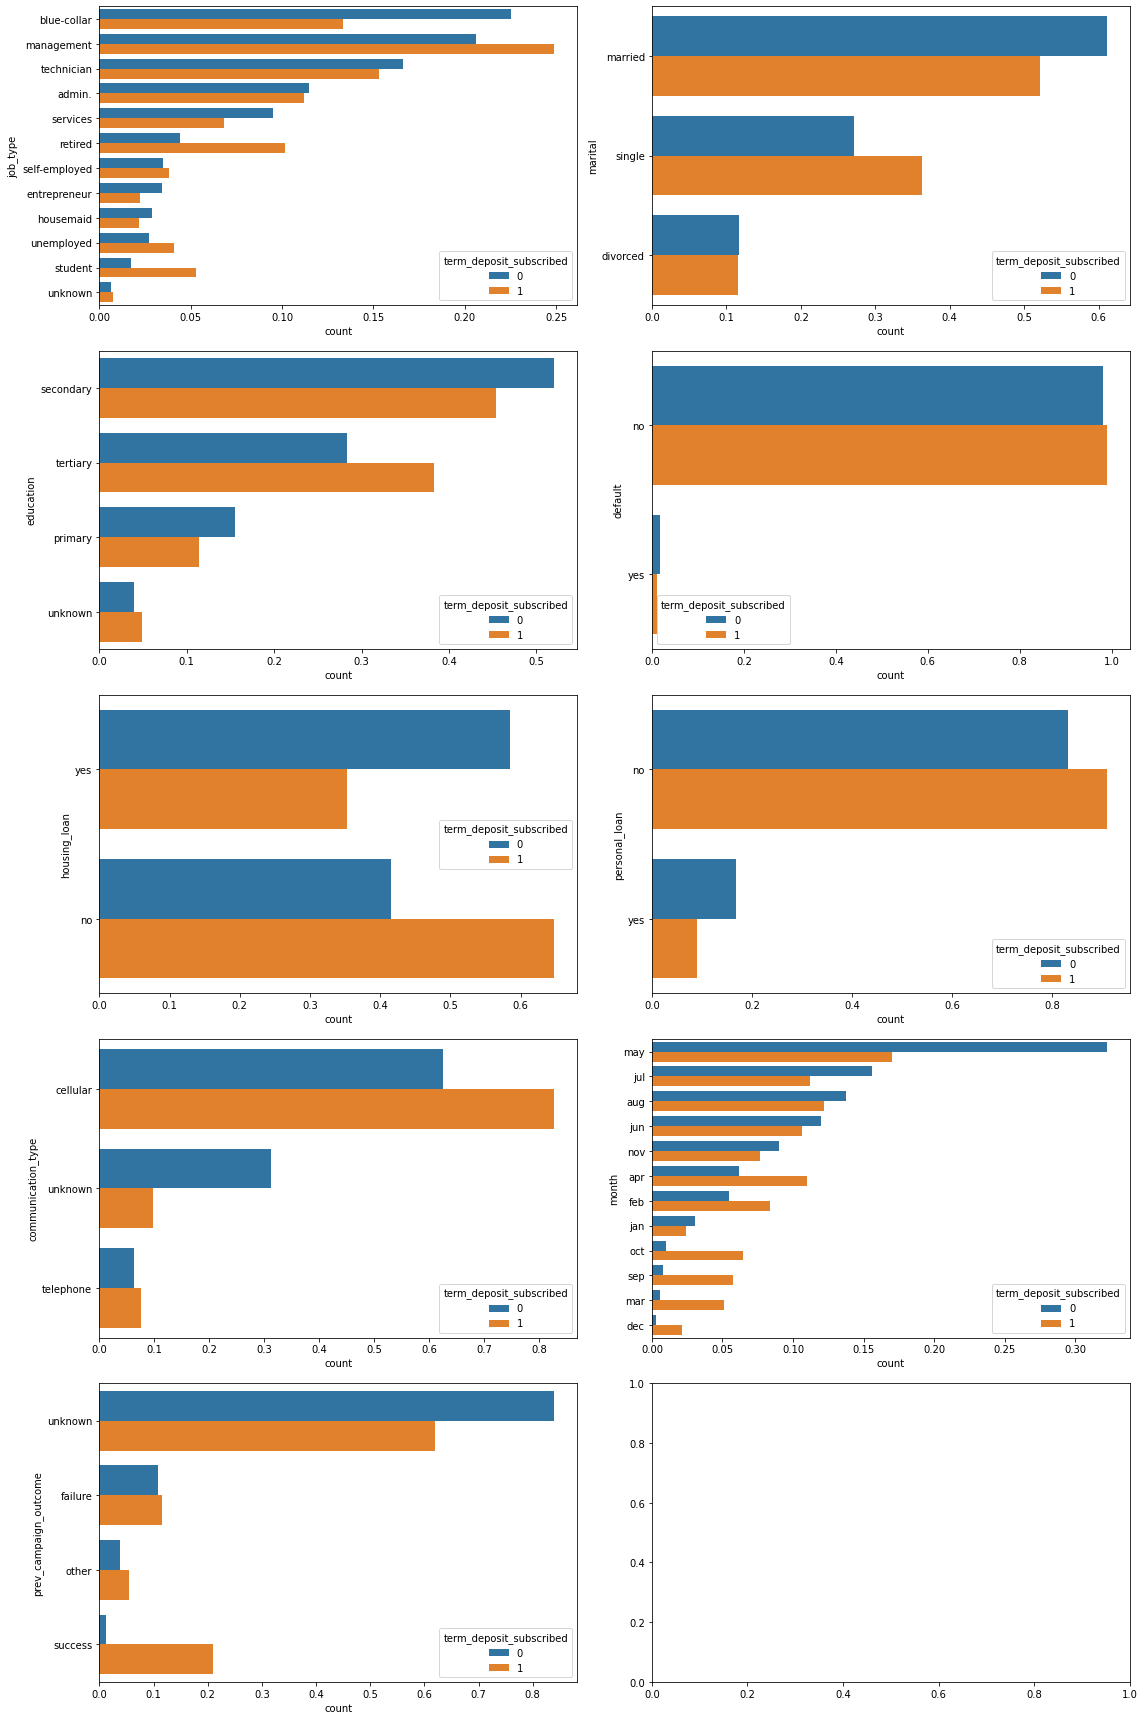

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(16,24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    fltr = train[TARGET_COL] == 0
    vc_a = train[fltr][c].value_counts(normalize=True).reset_index().rename({"index" : c, c: "count"}, axis=1)
    vc_b = train[~fltr][c].value_counts(normalize=True).reset_index().rename({"index" : c, c: "count"}, axis =1)

    vc_a[TARGET_COL] = 0
    vc_b[TARGET_COL] = 1

    df = pd.concat([vc_a, vc_b]).reset_index(drop=True)

    _ = sns.barplot(y = c, x = "count", data=df, hue=TARGET_COL, ax=axes[i])

_ = plt.tight_layout()

Does married person has high chance to subscribe a term deposit compared to a single or divorced person?

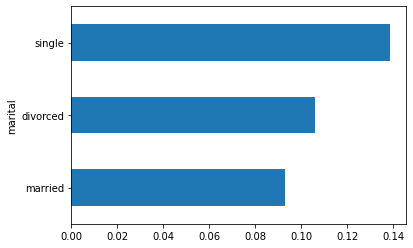

In [ ]:
_ = train.groupby("marital")[TARGET_COL].mean().sort_values().plot(kind="barh")

Single people are more likely to had a subscription of term deposit...


Does people without loan have more chances to subscribe for term deposit?


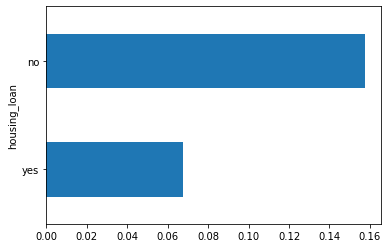

In [ ]:
_ = train.groupby("housing_loan")[TARGET_COL].mean().sort_values().plot(kind="barh")

Yes

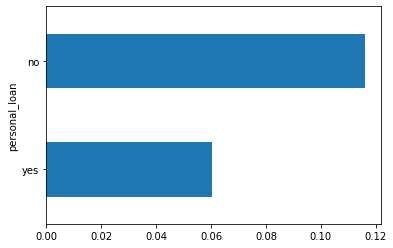

In [ ]:
_ = train.groupby("personal_loan")[TARGET_COL].mean().sort_values().plot(kind="barh")

Yes


Do a defaulted person has less chance of subscribing to term deposit?

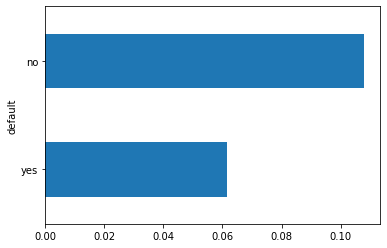

In [ ]:
_ = train.groupby("default")[TARGET_COL].mean().sort_values().plot(kind="barh")

Yes

### Numerical Features

Univariate analysis - Boxplots

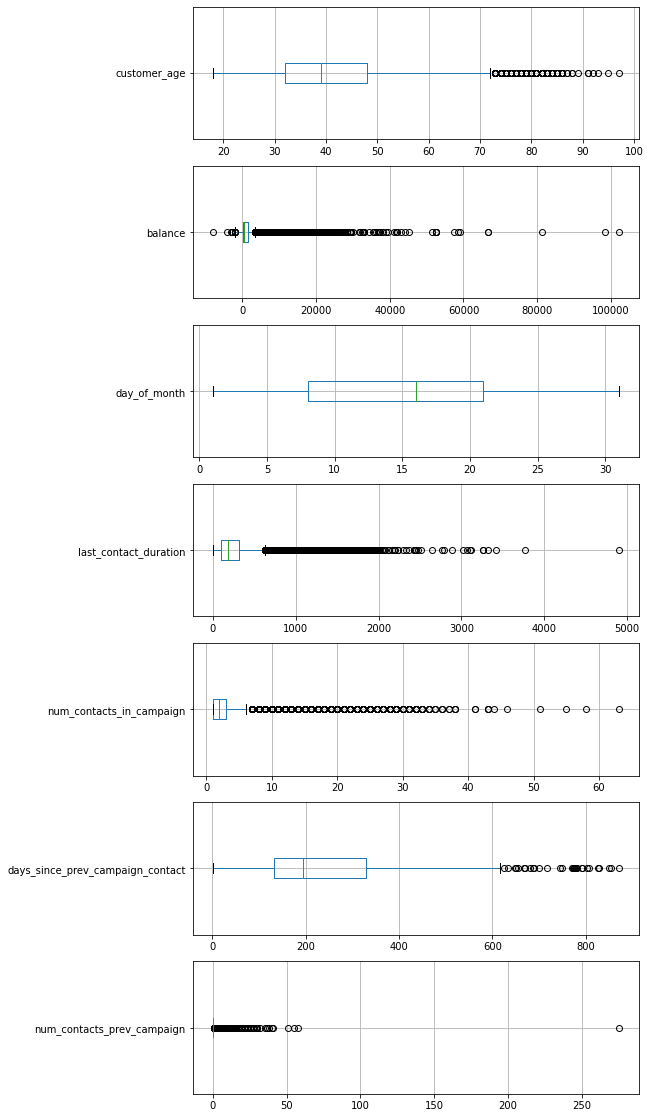

In [ ]:
fig, axes = plt.subplots(7,1 , figsize=(8, 20))

for i,c in enumerate(num_cols):
    _ = train[[c]].boxplot(ax = axes[i], vert = False)

Density Plots

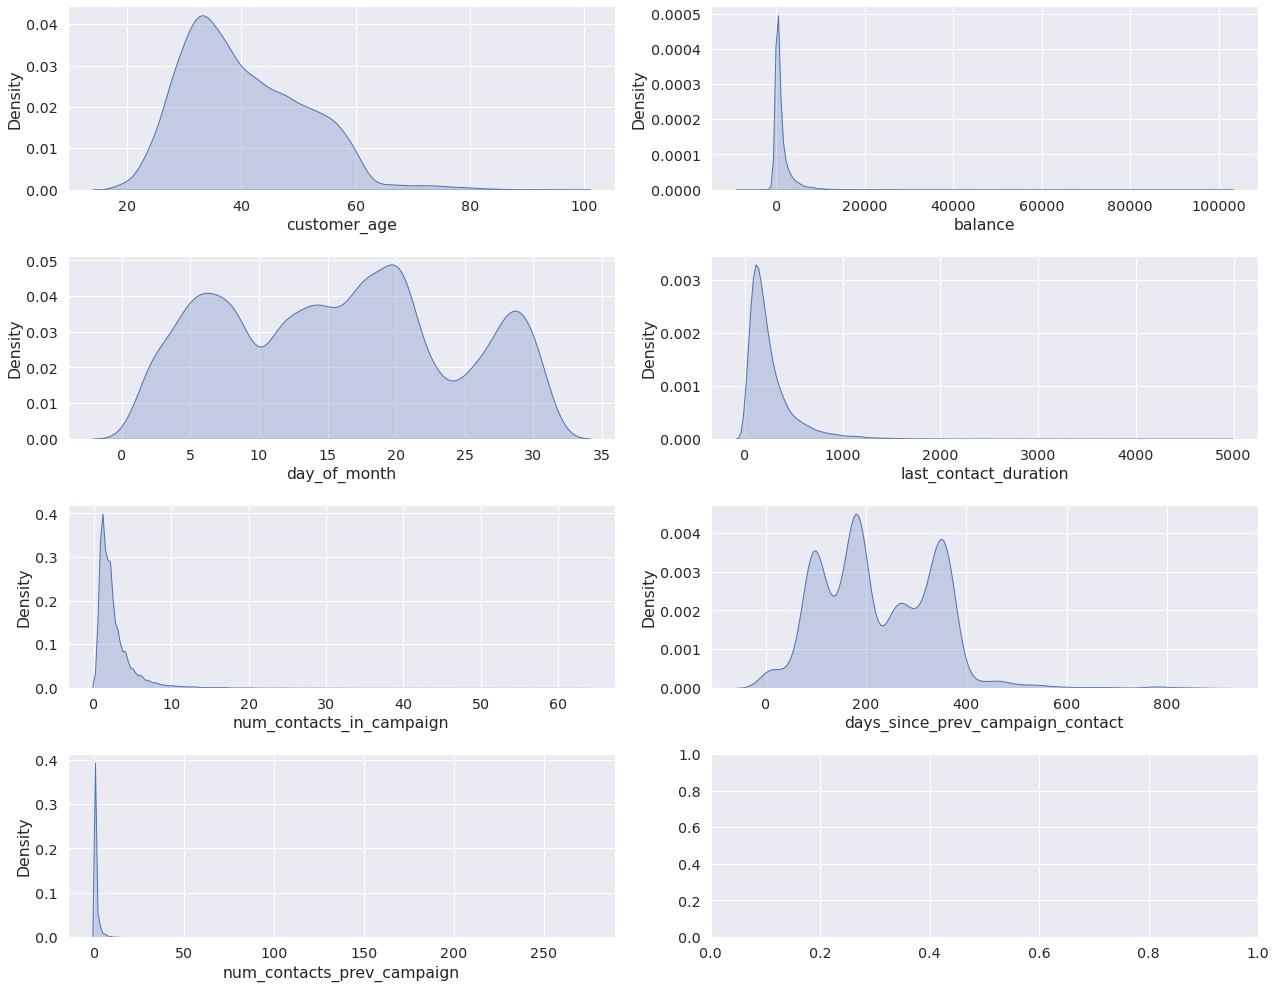

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(18,14))
axes = [ax for axes_row in axes for ax in axes_row]

for i,c in enumerate(num_cols):
    plot = sns.kdeplot(data = train, x=c, ax=axes[i],fill=True)

plt.tight_layout()

Bivariate Analysis - kdeplot

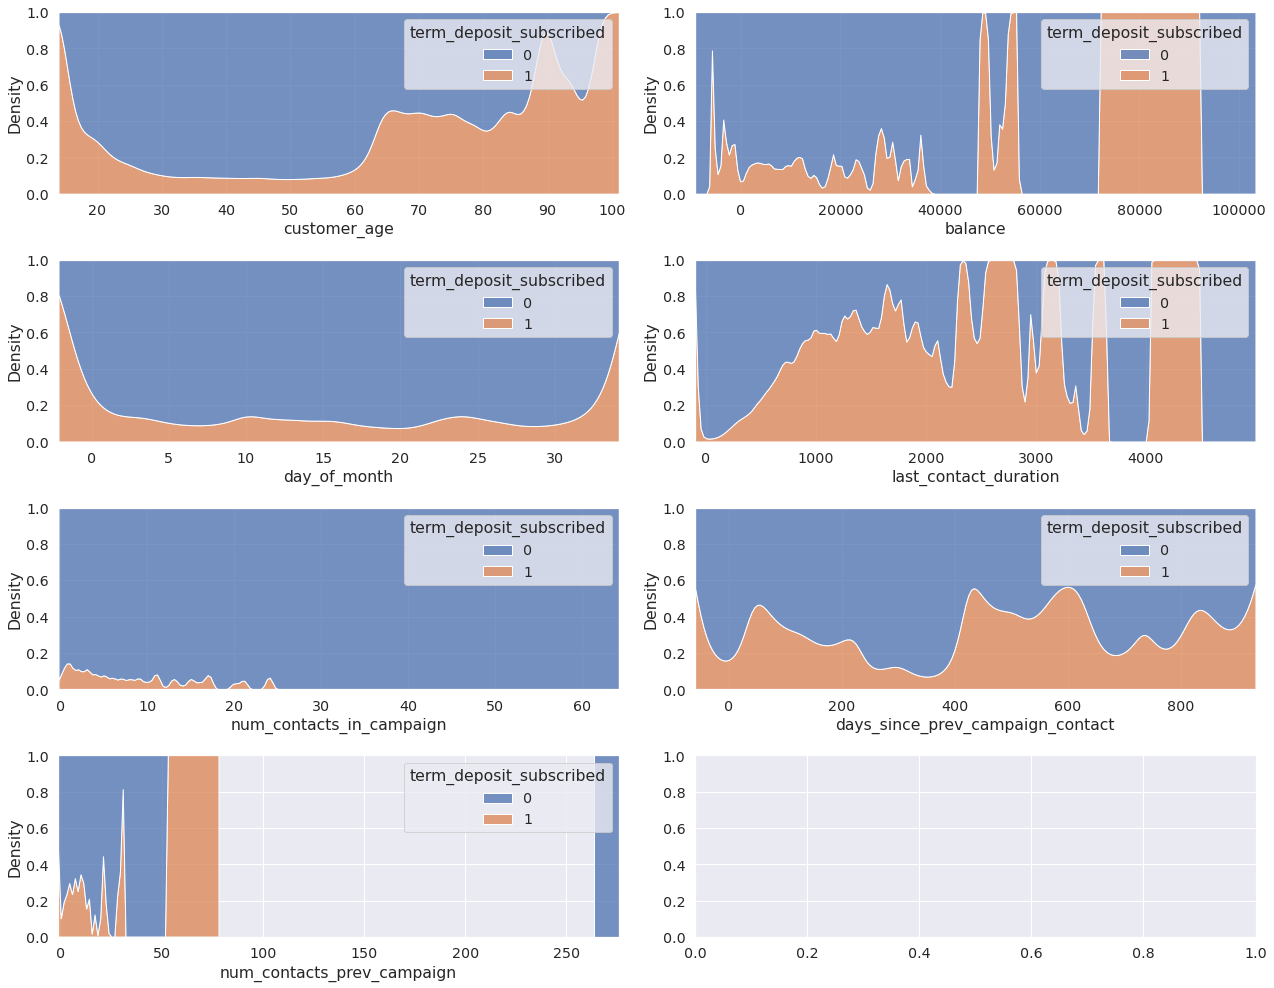

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(4,2, figsize=(18,14))

axes = [ax for axes_row in axes for ax in axes_row]

for i,c in enumerate(num_cols):
    plot = sns.kdeplot(data=train, x=c, hue=TARGET_COL,multiple="fill", ax=axes[i])

plt.tight_layout()

Bivariate Analysis - Horizontal Barplots

We are using median since it is not affected by outliers

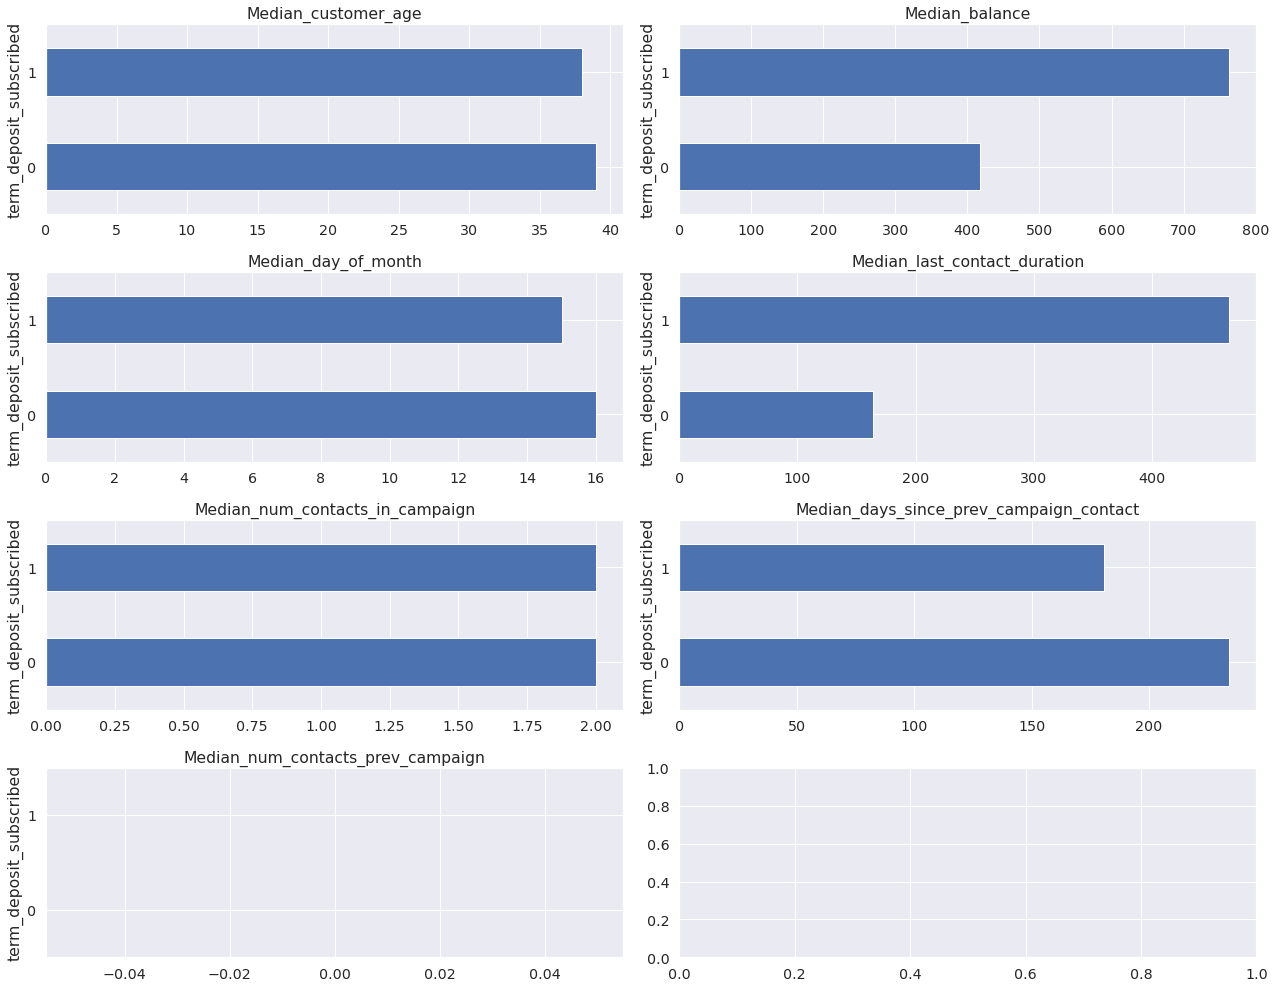

In [ ]:
sns.set(font_scale=1.3)
fig,axes = plt.subplots(4,2,figsize=(18,14))
axes = [ax for axes_row in axes for ax in axes_row]

for i,c in enumerate(num_cols):
    plot= train.groupby(TARGET_COL)[c].median().plot(kind="barh",title=f"Median_{c}", ax= axes[i])

plt.tight_layout()

Are people with a higher bank balance more likely to subscribe to term deposit instead of people with low bank balance?

Yes

Does the length of the call made to the customers tell us anything about their chances of subscribing?

More time means more chances of subscription

 Are younger customers more likely to subscribe to a term deposit compared to old customers ?

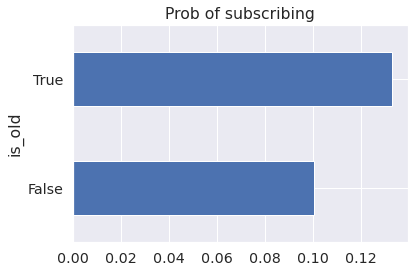

In [ ]:
train["is_old"] = True
train.loc[train["customer_age"]<=50, "is_old"] = False

_ = train.groupby("is_old")[TARGET_COL].mean().sort_values().plot(kind="barh", title="Prob of subscribing")

Older people are more likely to subscribe

In [ ]:
test["is_old"] = True
test.loc[test["customer_age"]<=50, "is_old"] = False

Bivariate Analysis - Correlation Heatmap

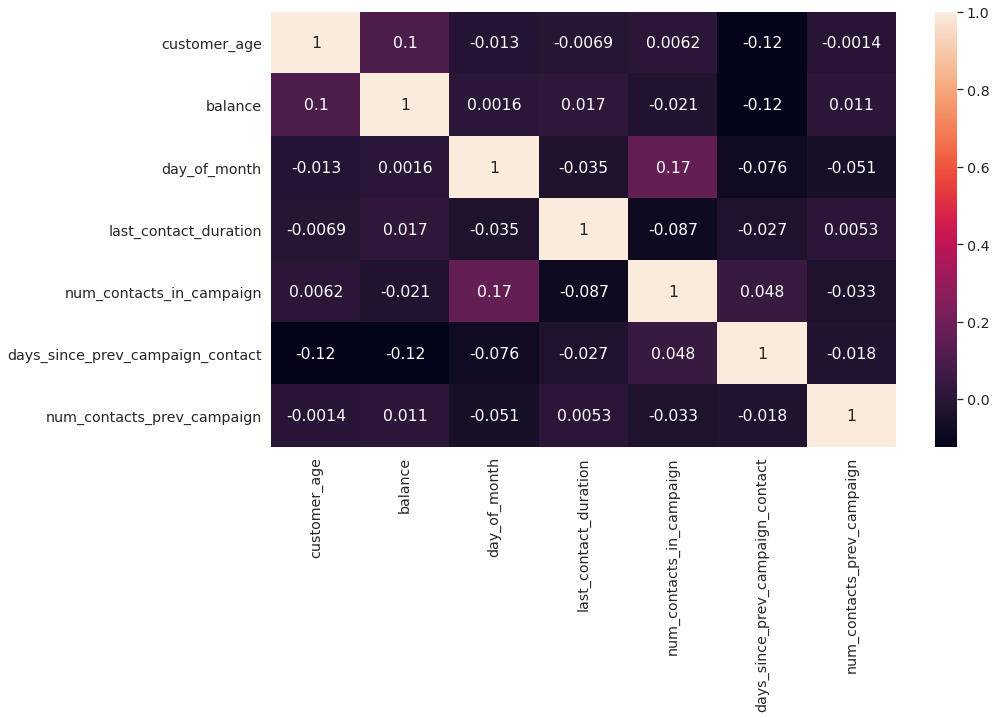

In [ ]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num_cols].corr(), annot=True)

# Data Pre processing

In [ ]:
train.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,is_old
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0,False
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0,False
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0,False
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0,False
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0,False


In [ ]:
test.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,is_old
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown,True
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown,False
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown,False
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown,True
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success,True


In [ ]:
train.shape

(31647, 19)

In [ ]:
test.shape

(13564, 18)

In [ ]:
dataset = pd.concat([train, test], sort=False)

In [ ]:
dataset.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,is_old
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0.0,False
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0.0,False
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0.0,False
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0.0,False
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0.0,False


In [ ]:
dataset.shape

(45211, 19)

In [ ]:
cat_cols.append("is_old")

In [ ]:
cat_cols

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome',
 'is_old']

In [ ]:
for i in cat_cols:
    print(dataset[i].nunique())
    print(dataset[i].unique())

12
['management' 'blue-collar' 'technician' 'services' 'retired'
 'entrepreneur' 'admin.' 'student' 'housemaid' 'self-employed' 'unknown'
 'unemployed']
3
['single' 'married' 'divorced' nan]
4
['tertiary' 'secondary' 'primary' 'unknown']
2
['no' 'yes']
2
['yes' 'no']
2
['no' 'yes' nan]
3
['unknown' 'cellular' 'telephone']
12
['jun' 'nov' 'feb' 'may' 'apr' 'aug' 'jul' 'jan' 'oct' 'sep' 'mar' 'dec']
4
['unknown' 'other' 'failure' 'success']
2
[False  True]


In [ ]:
100*(dataset.isnull().sum()/dataset.shape[0]).sort_values(ascending=False)

days_since_prev_campaign_contact    81.736745
term_deposit_subscribed             30.001548
customer_age                         1.966336
balance                              1.282874
last_contact_duration                0.957732
marital                              0.510938
personal_loan                        0.493243
num_contacts_in_campaign             0.347261
is_old                               0.000000
job_type                             0.000000
education                            0.000000
default                              0.000000
communication_type                   0.000000
housing_loan                         0.000000
day_of_month                         0.000000
month                                0.000000
num_contacts_prev_campaign           0.000000
prev_campaign_outcome                0.000000
id                                   0.000000
dtype: float64

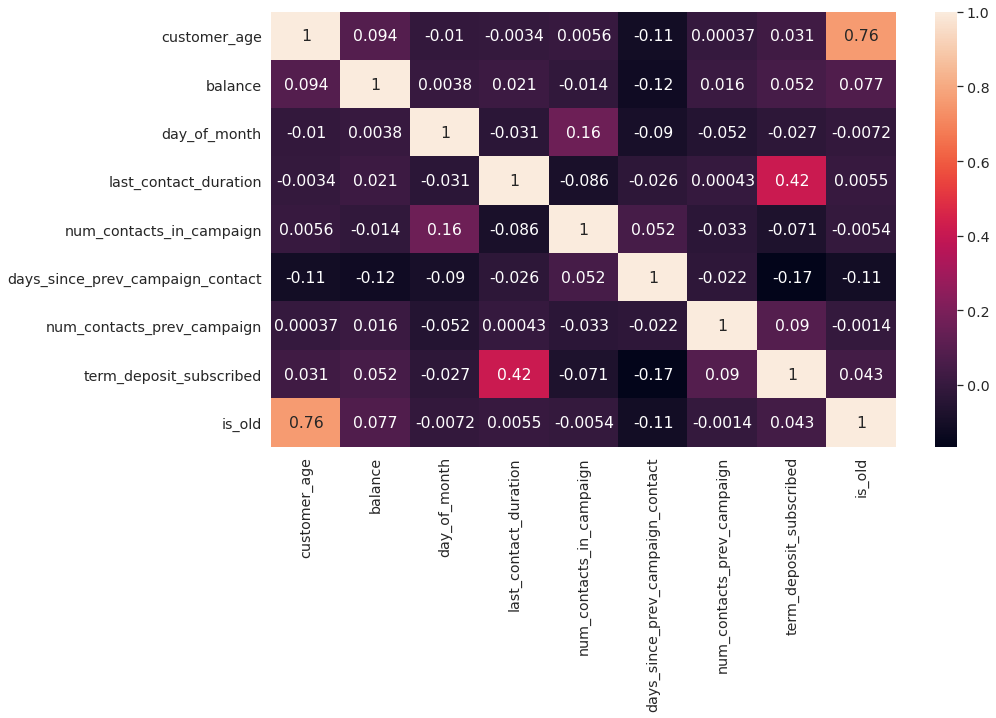

In [ ]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(dataset.corr(), annot=True)

Droping days_since_prev_campaign_contact as it has 80% of null values and very low negative correlation with target variable

In [ ]:
dataset =  dataset.drop("days_since_prev_campaign_contact",axis=1)

In [ ]:
len(dataset.columns)

18

In [ ]:
100*(dataset.isnull().sum()/dataset.shape[0]).sort_values(ascending=False)

term_deposit_subscribed       30.001548
customer_age                   1.966336
balance                        1.282874
last_contact_duration          0.957732
marital                        0.510938
personal_loan                  0.493243
num_contacts_in_campaign       0.347261
job_type                       0.000000
education                      0.000000
default                        0.000000
is_old                         0.000000
housing_loan                   0.000000
communication_type             0.000000
day_of_month                   0.000000
month                          0.000000
num_contacts_prev_campaign     0.000000
prev_campaign_outcome          0.000000
id                             0.000000
dtype: float64

In [ ]:
for i in [dataset]:
    i["marital"] = i["marital"].map({'married':0,'single':1, 'divorced':2,"nan":"nan"})
    i["personal_loan"] = i["personal_loan"].map({"yes":0,"no":1,"nan":"nan"})

In [ ]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Load data
cat_columns_with_null_values = ['marital', 'personal_loan', 'num_contacts_in_campaign']
num_columns_with_null_values = ["customer_age",'balance','last_contact_duration']
dataset_null_cat =dataset.reindex(columns=cat_columns_with_null_values)
dataset_null_num = dataset.reindex(columns=num_columns_with_null_values)
# Run imputer with a Random Forest estimator
cat_imp = IterativeImputer(RandomForestClassifier(), max_iter=10, random_state=0)
num_imp = IterativeImputer(RandomForestRegressor(),max_iter=10, random_state=0)

dataset_null_cat = pd.DataFrame(cat_imp.fit_transform(dataset_null_cat), columns=dataset_null_cat.columns)
dataset_null_num = pd.DataFrame(num_imp.fit_transform(dataset_null_num), columns=dataset_null_num.columns)


In [ ]:
dataset.shape

(45211, 18)

In [ ]:
dataset.drop(cat_columns_with_null_values,axis=1,inplace=True)
dataset.drop(num_columns_with_null_values,axis=1,inplace=True)

In [ ]:
dataset.reset_index(drop = True,inplace=True)
dataset = pd.concat([dataset, dataset_null_cat],axis=1)
dataset = pd.concat([dataset, dataset_null_num],axis=1)

In [ ]:
dataset.shape

(45211, 18)

In [ ]:
100*(dataset.isnull().sum()/dataset.shape[0]).sort_values(ascending=False)

term_deposit_subscribed       30.001548
last_contact_duration          0.000000
month                          0.000000
job_type                       0.000000
education                      0.000000
default                        0.000000
housing_loan                   0.000000
communication_type             0.000000
day_of_month                   0.000000
num_contacts_prev_campaign     0.000000
balance                        0.000000
prev_campaign_outcome          0.000000
is_old                         0.000000
marital                        0.000000
personal_loan                  0.000000
num_contacts_in_campaign       0.000000
customer_age                   0.000000
id                             0.000000
dtype: float64

In [ ]:
dataset = dataset.fillna(999)

In [ ]:
dataset.drop("id",axis=1,inplace=True)

In [ ]:
dataset.head()

,job_type,education,default,housing_loan,communication_type,day_of_month,month,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,is_old,marital,personal_loan,num_contacts_in_campaign,customer_age,balance,last_contact_duration
0,management,tertiary,no,yes,unknown,26,jun,0,unknown,0.0,False,1.0,1.0,4.0,28.0,285.0,303.0
1,blue-collar,secondary,no,no,cellular,18,nov,1,other,0.0,False,0.0,0.0,2.0,34.0,934.0,143.0
2,technician,secondary,no,no,cellular,5,feb,0,unknown,0.0,False,0.0,1.0,4.0,46.0,656.0,101.0
3,services,secondary,no,yes,unknown,20,may,0,unknown,0.0,False,1.0,1.0,3.0,34.0,2.0,127.0
4,blue-collar,primary,no,yes,cellular,13,may,0,unknown,0.0,False,0.0,1.0,2.0,41.0,1352.0,49.0


In [ ]:
dataset["marital"] = dataset["marital"].astype(int)
dataset["personal_loan"] = dataset["personal_loan"].astype(int)
dataset["num_contacts_in_campaign"] = dataset["num_contacts_in_campaign"].astype(int)

In [ ]:
dataset.is_old.unique()

array([False,  True])

In [ ]:
for i in [dataset]:
    i["education"] = i["education"].map({"tertiary":2,'secondary':1,'primary':0,'unknown':3}).astype(int)
    i["default"] = i["default"].map({"no":0,"yes":1}).astype(int)
    i["housing_loan"] = i["housing_loan"].map({"no":0,"yes":1}).astype(int)
    i["communication_type"] = i["communication_type"].map({'unknown':2,'cellular':1,'telephone':0}).astype(int)
    i["prev_campaign_outcome"] = i["prev_campaign_outcome"].map({'unknown':0,'other':1,'failure':2,'success':3}).astype(int)
    i["is_old"] = i["is_old"].map({False:0,True:1}).astype(int)


In [ ]:
dataset.head()

,job_type,education,default,housing_loan,communication_type,day_of_month,month,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,is_old,marital,personal_loan,num_contacts_in_campaign,customer_age,balance,last_contact_duration
0,management,2,0,1,2,26,jun,0,0,0.0,0,1,1,4,28.0,285.0,303.0
1,blue-collar,1,0,0,1,18,nov,1,1,0.0,0,0,0,2,34.0,934.0,143.0
2,technician,1,0,0,1,5,feb,0,0,0.0,0,0,1,4,46.0,656.0,101.0
3,services,1,0,1,2,20,may,0,0,0.0,0,1,1,3,34.0,2.0,127.0
4,blue-collar,0,0,1,1,13,may,0,0,0.0,0,0,1,2,41.0,1352.0,49.0


In [ ]:
dataset.shape

(45211, 17)

In [ ]:
new_dataset= pd.get_dummies(dataset,columns=["job_type","month"])

In [ ]:
new_dataset.shape

(45211, 39)

In [ ]:
train_proc, test_proc = new_dataset[:train.shape[0]], new_dataset[train.shape[0]:].reset_index(drop = True)

In [ ]:
train_proc.shape

(31647, 39)

In [ ]:
test_proc.shape

(13564, 39)

In [ ]:
x_train = train_proc.drop("term_deposit_subscribed",axis=1)
y_train = train_proc["term_deposit_subscribed"]

In [ ]:
x_test = test_proc.drop("term_deposit_subscribed",axis=1)

In [ ]:
y_train = pd.DataFrame(data = y_train,columns=["term_deposit_subscribed"])

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train_1, x_val, y_train_1, y_val = train_test_split(x_train, y_train, test_size=0.2,stratify = train_proc[TARGET_COL])

Sampling to increase minority samples

In [ ]:
y_train.reset_index(drop=True,inplace=True)

In [ ]:
# x_train_1.reset_index(drop=True,inplace=True)

In [ ]:
x_train.head()

,education,default,housing_loan,communication_type,day_of_month,num_contacts_prev_campaign,prev_campaign_outcome,is_old,marital,personal_loan,num_contacts_in_campaign,customer_age,balance,last_contact_duration,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self-employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,job_type_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,2,0,1,2,26,0,0,0,1,1,4,28.0,285.0,303.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,1,18,1,1,0,0,0,2,34.0,934.0,143.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,5,0,0,0,0,1,4,46.0,656.0,101.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,1,2,20,0,0,0,1,1,3,34.0,2.0,127.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,1,13,0,0,0,0,1,2,41.0,1352.0,49.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
from imblearn.over_sampling import SMOTENC
x_resampled, y_resampled = SMOTENC(sampling_strategy="minority",categorical_features=[0,1,2,3,4,5,6,7,8,9,10,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]).fit_resample(x_train, y_train)
x_resampled = pd.DataFrame(x_resampled, columns=x_train.columns)
y_resampled = pd.DataFrame(y_resampled,columns=y_train.columns)

In [ ]:
x_resampled.shape

(56506, 38)

In [ ]:
y_resampled.term_deposit_subscribed.value_counts()

1.0    28253
0.0    28253
Name: term_deposit_subscribed, dtype: int64

In [ ]:
x_resampled["balance"] = np.log(x_resampled["balance"])
x_test["balance"] = np.log(x_test["balance"])
x_resampled["last_contact_duration"] = np.log(x_resampled["last_contact_duration"])
x_test["last_contact_duration"] = np.log(x_test["last_contact_duration"])

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
y_resampled.shape

(56506, 1)

In [ ]:
import xgboost
xgb_reg3 = xgboost.XGBClassifier()
cross_val_score(xgb_reg3,x_resampled,y_resampled,scoring=make_scorer(f1_score),cv=3)

array([0.89444649, 0.92442008, 0.92241379])

We'll use RandomForest 

### Let's try hyperparameter tuning

In [ ]:
from sklearn.model_selection import StratifiedKFold
skfolds = StratifiedKFold(n_splits=3,random_state=42)

#### Random Search


In [ ]:
n_estimators = [300,150,450,200,500]
max_depth = ["None",4,5,6,7,8,10,20,30,40]
learning_rate=["0.1","0.2","0.5","0.3","0.01"]
# max_features = ["auto",0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
min_child_samples=["20","10","5","30"]
# min_samples_split = [2,5,10,15,20,25]
# min_samples_leaf = [1,2,5,10,15]

param_grid = dict(n_estimators = n_estimators,max_depth=max_depth,learning_rate=learning_rate,
                  min_child_samples=min_child_samples)


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_test = scaler.fit_transform(x_test)
# x_resampled = scaler.fit_transform(x_resampled)

In [ ]:
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(n_jobs=-1)

In [ ]:
import time
from sklearn.model_selection import RandomizedSearchCV

rand = RandomizedSearchCV(estimator=lgb_clf,param_distributions=param_grid,cv = 4,n_jobs = -1)

start_time = time.time()
rand_result = rand.fit(x_resampled,y_resampled)

print(f"Best: {rand_result.best_score_} using {rand_result.best_params_}" )
print(f"Execution time: {str((time.time() - start_time))} ms")

Best: 0.9337250079302758 using {'n_estimators': 300, 'min_child_samples': '20', 'max_depth': 6, 'learning_rate': '0.3'}
Execution time: 82.6125955581665 ms


In [ ]:
lgb_clf_2 = lgb.LGBMClassifier(n_estimators=300,min_child_samples=20,max_depth=6,learning_rate=0.3,n_jobs=-1) 

In [ ]:
lgb_clf_2.fit(x_resampled,y_resampled)
y_pred = lgb_clf_2.predict(x_test)

In [ ]:
df = pd.DataFrame(data = y_pred,columns=["term_deposit_subscribed"])

In [ ]:
df.head()

,term_deposit_subscribed
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


In [ ]:
df["term_deposit_subscribed"] = df["term_deposit_subscribed"].astype(int)

In [ ]:
df.term_deposit_subscribed.value_counts()

0    11975
1     1589
Name: term_deposit_subscribed, dtype: int64

In [ ]:
sample.shape

(13564, 2)

In [ ]:
test.shape

(13564, 18)

In [ ]:
sub = pd.concat([sample["id"],df],axis=1)

In [ ]:
sub.head()

,id,term_deposit_subscribed
0,id_17231,0
1,id_34508,0
2,id_44504,0
3,id_174,0
4,id_2115,1


In [ ]:
sub.to_csv("submission4.csv",index=False)